/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide


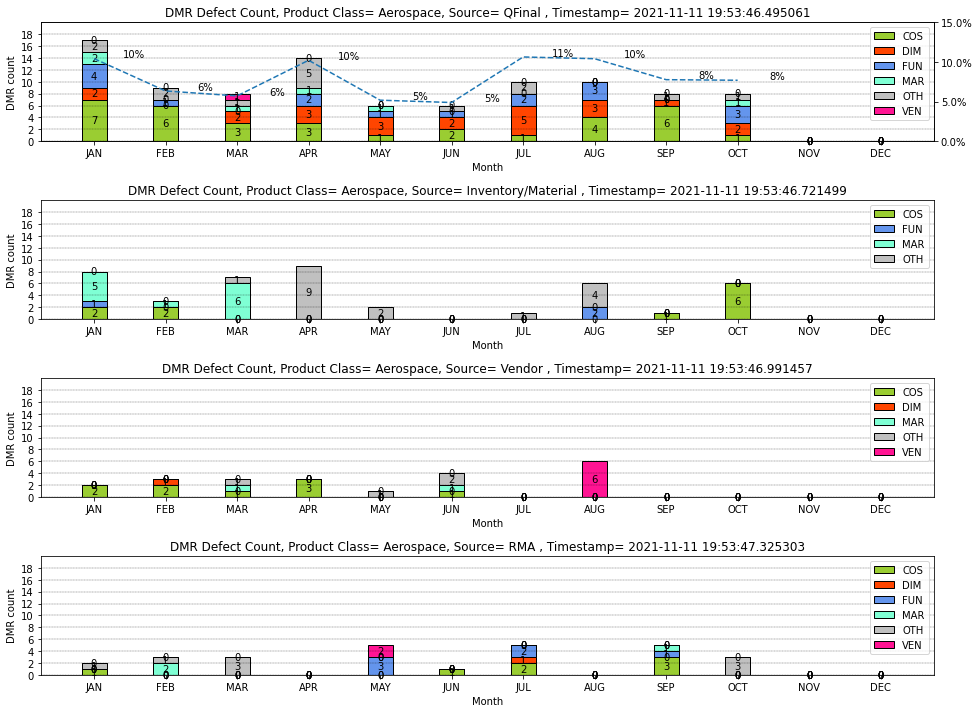

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import datetime
df=pd.read_csv('DMR.csv',encoding = "ISO-8859-1")

#print(df.iloc[1,:])

jobs=[163,142,140,137,116,123,94,96,103,104,0,0]

count=[]


#format time & set index
df['Sys Date']=pd.to_datetime(df['Sys Date'])
df['Sys Date']=df['Sys Date'].dt.strftime('%m')
df=df.set_index("Sys Date")
col_len=len(df.iloc[0,:])
df['DefGroup']=df.iloc[:,col_len-1].str[:3]
df['Class']=df.iloc[:,col_len-2]
#print(df.tail())
#Class aggregate
df['Class']= np.where((df['Class']=="INDUSTRIAL:Metal Fittings"), "Fittings", df['Class'])
df['Class']= np.where((df['Class']=="OTHER:Metal Fittings"), "Fittings", df['Class'])
df['Class']= np.where((df['Class']=="AERO:Metal Fittings"), "Fittings", df['Class'])

df['Class']= np.where((df['Class']=="AM-PM:Finished Item-Medical"), "AM-PM", df['Class'])
df['Class']= np.where((df['Class']=="AM-PM:Comp. Medical: FL"), "AM-PM", df['Class'])

df['Class']= np.where((df['Class']=="INDUSTRIAL:Finished Assy"), "Industrial", df['Class'])
df['Class']= np.where((df['Class']=="READYFLEX:Finished Assy"), "Industrial", df['Class'])

df['Class']= np.where((df['Class']=="AERO:Finished Assy"), "Aerospace", df['Class'])

df['Class']= np.where((df['Class']=="MEDICAL:Finished Assy"), "Flex Med", df['Class'])

#Class match
cls="Aerospace"
df['TrType']=df.iloc[:,11]
df=df[df['Class']==cls]

#Tr type match
df1=df[df['TrType']=="D"]
df2=df[(df['TrType']=="I") | (df['TrType']=="M")]
df3=df[(df['TrType']=="P") | (df['TrType']=="S")]
df4=df[df['TrType']=="R"]

types=['QFinal','Inventory/Material','Vendor','RMA']
list1=[df1,df2,df3,df4]
fig, ax = plt.subplots(len(list1),figsize=(16,12))
plt.subplots_adjust(hspace=0.5)

color_dict={'COS':'yellowgreen',"DIM":'orangered', "FUN": 'cornflowerblue','MAR':'aquamarine',"OTH": 'silver',"VEN":'deeppink'}



for j in range (0,len(list1)):
#pivot table
    p1=pd.pivot_table(list1[j],index='Sys Date',columns='DefGroup',values='DMR Number',aggfunc='count')
    p1=p1.fillna(0)

    #zero array and sum for no data months
    cols=(p1.columns.to_numpy())
    zeros=np.zeros((12,len(cols)))
    slate=pd.DataFrame(zeros,columns=cols)
    slate.index=['01','02','03','04','05','06','07','08','09','10','11','12']
    p1=p1.add(slate,fill_value=0)

    #bar plot variables
    hor_len=len(p1.iloc[0,:].to_numpy())
    ver_len=len(p1.iloc[:,0].to_numpy())
    bot=[0]*ver_len
    lbl=p1.columns.to_numpy()
    ind = np.arange(ver_len)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    for i in range(0,hor_len):
        y=p1.iloc[:,i].to_numpy()
        p=ax[j].bar(ind,y,width,bottom=bot,label=lbl[i],color=color_dict[lbl[i]],edgecolor='black') 
        bot=np.add(bot,y)
        #if y>0:
        ax[j].bar_label(p,label_type='center')
        #else: 
            #pass
    count=np.append(count,bot,axis=0)
    #print(count)
    
    ax[j].axhline(0, color='grey', linewidth=0.8)
    ax[j].set_ylabel("DMR count")
    ax[j].set_title("DMR Defect Count, Product Class= "+cls+ ", Source= "+types[j] +" , Timestamp= " +str(datetime.today()))
    ax[j].set_xlabel("Month")
    ax[j].set_xticks(ind)
    ax[j].set_yticks(np.arange(0,20,2),minor=False)
    ax[j].set_xticklabels(('JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'))
    ax[j].set_ylim(0,20)
    ax[j].grid(axis='y',color='black', linestyle='dashed', linewidth=0.3)
    ax[j].legend()
    
    if j==0:
        axx=ax[j].twinx()
        perc=(count/jobs)*100
        axx.plot(ind,perc,label=perc,linestyle='dashed')
        axx.yaxis.set_major_formatter(mtick.PercentFormatter())
        axx.set_ylim(0,15)
        for x,y in zip (ind,perc):
            label = "{:.0%}".format(y/100)
            axx.annotate(label,(x,y),textcoords='offset points',xytext=(40,1),ha='center')
    else: 
        pass
    count=[]
plt.show()
#fig.savefig("%s.jpeg" % cls,quality=95)